In [41]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
import random

In [2]:
giftcard = pd.read_csv('amazon_reviews_us_Gift_Card_v1_00.tsv', sep='\t')

In [4]:
giftcard.head(100)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,24371595,R27ZP1F1CD0C3Y,B004LLIL5A,346014806,Amazon eGift Card - Celebrate,Gift Card,5,0,0,N,Y,Five Stars,Great birthday gift for a young adult.,2015-08-31
1,US,42489718,RJ7RSBCHUDNNE,B004LLIKVU,473048287,Amazon.com eGift Cards,Gift Card,5,0,0,N,Y,Gift card for the greatest selection of items ...,It's an Amazon gift card and with over 9823983...,2015-08-31
2,US,861463,R1HVYBSKLQJI5S,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,5,0,0,N,Y,Five Stars,Good,2015-08-31
3,US,25283295,R2HAXF0IIYQBIR,B00IX1I3G6,926539283,Amazon.com Gift Card Balance Reload,Gift Card,1,0,0,N,Y,One Star,Fair,2015-08-31
4,US,397970,RNYLPX611NB7Q,B005ESMGV4,379368939,"Amazon.com Gift Cards, Pack of 3 (Various Desi...",Gift Card,5,0,0,N,Y,Five Stars,I can't believe how quickly Amazon can get the...,2015-08-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,US,9033254,R1TS3MW501CTP6,B00B2TFURQ,527289417,Amazon Gift Card - Print - Thank You (Note),Gift Card,5,0,0,N,Y,Five Stars,Awesome gift,2015-08-31
96,US,29132432,R1Y3I0RJ1JZD53,BT00CTOY20,775486538,Amazon.com Gift Card in a Greeting Card (Vario...,Gift Card,5,0,0,N,Y,Works like a charm,Good as money on this site!,2015-08-31
97,US,18985804,R1EDV9IZ0628IG,B00PG40CO4,137115061,Amazon eGift Card - Happy Birthday (Doughnuts),Gift Card,5,0,0,N,Y,Five Stars,great,2015-08-31
98,US,30984333,R3ATXW3TX9TQM6,B00BWDH3VS,473048287,Amazon.com eGift Cards,Gift Card,5,0,0,N,Y,Great Choice.,Suited the person I sent it to well. Graphics...,2015-08-31


In [5]:
giftcard.describe()

,customer_id,product_parent,star_rating,helpful_votes,total_votes
count,1.483100e+05,1.483100e+05,148310.000000,148310.000000,148310.000000
mean,2.628931e+07,5.406163e+08,4.731333,0.397424,0.490493
std,1.587236e+07,2.661563e+08,0.829255,20.701385,22.823494
min,1.063700e+04,1.100879e+06,1.000000,0.000000,0.000000
25%,1.289732e+07,3.612555e+08,5.000000,0.000000,0.000000
50%,2.499530e+07,4.730483e+08,5.000000,0.000000,0.000000
75%,4.139731e+07,7.754865e+08,5.000000,0.000000,0.000000
max,5.309648e+07,9.992742e+08,5.000000,5987.000000,6323.000000


In [6]:
giftcard.shape

(148310, 15)

## Tasks — Regression (week 1):
First, let’s see how ratings can be predicted as a function of (a) whether a review is a ‘verified purchase’, and (b) the length of the review (in characters).

#### 1. What is the distribution of ratings in the dataset? That is, how many 1-star, 2-star, 3-star (etc.) reviews are there? You may write out the values or include a simple plot

Answer: <br>
See below <br>

In [7]:
gcSR = giftcard[['star_rating']]

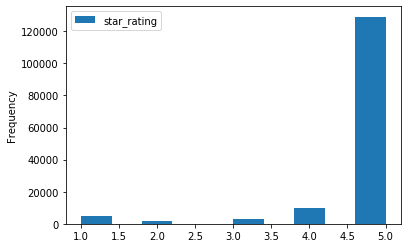

In [8]:
gcSR.plot.hist()

In [9]:
gcSRg = gcSR.groupby('star_rating')
gcSRg.size()

star_rating
1      4766
2      1560
3      3147
4      9808
5    129029
dtype: int64

#### 3. Train a simple predictor to predict the star rating using two features:
   star rating ≃ θ0 + θ1 × [review is verified] + θ2 × [review length]

Report the values of θ0, θ1, and θ2. Briefly describe your interpretation of these values, i.e., what do θ0, θ1, and θ2 represent? Explain these in terms of the features and labels, e.g. if the coefficient of ‘review length’ is negative, what would that say about verified versus unverified reviews?

Answer: <br>
(1) <br>
θ0: 4.845035 <br>
θ1: 0.049858 <br>
θ2:-0.001245 <br>
(2) <br>
θ0: Base of the star rating (higher than the mean of overall star rating, 4.73133) <br>
θ1: If the review is verified, the star rating would be increased <br>
θ2: Longer the review length, lower the star rating

In [10]:
def feature(row):
    feat = [1]
    if row['verified_purchase'] == "Y":
        feat.append(1)
    else:
        feat.append(0)
    feat.append(len(str(row['review_body'])))
    return feat

X1 = []
Y = giftcard.star_rating.to_list()

for index, row in giftcard.iterrows():
    X1.append(feature(row))

In [11]:
theta,residuals,rank,s = np.linalg.lstsq(X1, Y, rcond = -1)
np.array(theta)

array([ 4.84503535e+00,  4.98577544e-02, -1.24545535e-03])

#### 4. Train another predictor that only uses one feature:
star rating ≃ θ0 + θ1 × [review is verified]
Report the values of θ0 and θ1. Note that coefficient you found here might be quite different (i.e., much larger or smaller) than the one from Question 3, even though these coefficients refer to the same feature.

Answer: <br>
(1) <br>
θ0: 4.578143 <br>
θ1: 0.16793392 <br>
(2) <br>
θ0: Base of the star rating (below to the mean of overall star rating, 4.73133) <br>
θ1: If the review is verified, the star rating would be increased <br>
=> Compared to Q3, the importance of θ1 is increased

In [12]:
def feature2(row):
    feat = [1]
    if row['verified_purchase'] == "Y":
        feat.append(1)
    else:
        feat.append(0)
    return feat

X2 = []

for index, row in giftcard.iterrows():
    X2.append(feature2(row))

In [13]:
theta,residuals,rank,s = np.linalg.lstsq(X2, Y, rcond = -1)
theta

array([4.578143  , 0.16793392])

#### 5. Split the data into two fractions -
The first 90% for training, and the remaining 10% testing (based on the order they appear in the file). Train the same model as in Question 4 on the training set only. What is the model’s MSE on the training and on the test set (1 mark)?

Answer: <br>
(1) <br>
model’s MSE on the training set: 0.6554842196694356 <br>
model’s MSE on the testing set: 0.9723851990304192 <br>

In [14]:
numTraining = int(giftcard.shape[0] * 0.9)
numTraining

133479

In [15]:
X3_training = X2[:numTraining]
Y3_training = Y[:numTraining]
X3_testing = X2[numTraining:]
Y3_testing = Y[numTraining:]

In [16]:
theta,residuals,rank,s = np.linalg.lstsq(X3_training, Y3_training, rcond = -1)
theta

array([4.43966713, 0.31636878])

In [17]:
MSE_testing = mean_squared_error(np.dot(X3_testing, theta), Y3_testing)
MSE_testing

0.9723851990304192

In [18]:
MSE_training = mean_squared_error(np.dot(X3_training, theta), Y3_training)
MSE_training

0.6554842196694356

In [19]:
MSE_training_also = (residuals/len(X3_training))[0]
MSE_training_also

0.6554842196684152

#### 7. Repeat the above experiment, varying the size of the training and test fractions between 5% and 95% for training (using the complement for testing).
Show how the training and test error vary as a function of the training set size (again using a simple plot or table). Does the size of the training set make a significant difference in testing performance? Comment on why it might or might not make a significant difference in this instance

Answer: <br>
(1) <br>
See below results <br>
(2) <br>
Yes, the testing MSE increases when the training set becomes larger. Which means, the model is overfitting to the training data. Even worse, testing MSE increases steeply when the training set fraction is 90% or higher. The reason, when the fraction of training set going higher, θ0 increases gradually, and θ1 decreases gradually. That means, when the fraction of training set going higher, the contribution of verified review or not decrease, which leads to a higher Testing MSE. <br>

In [20]:
numData = len(X2)
sizeTrainings = list(range(5,100,5))
sizeTrainings = [int((i/100.0)*numData) for i in sizeTrainings]
#sizeTrainings

In [24]:
def trainAndGetMSE(X_train,Y_train,X_test,Y_test):
    theta,residuals,rank,s = np.linalg.lstsq(X_train, Y_train, rcond = -1)
    MSE_testing = mean_squared_error(np.dot(X_test, theta), Y_test)
    MSE_training = mean_squared_error(np.dot(X_train, theta), Y_train)
    print("Theta: ", theta)
    return [MSE_training, MSE_testing]

In [25]:
resultsTrainTestMSE = []
resultsTrainMSE = []
resultsTestMSE = []
for numTraining in sizeTrainings:
    X_training = X2[:numTraining]
    Y_training = Y[:numTraining]
    X_testing = X2[numTraining:]
    Y_testing = Y[numTraining:]
    trainMSE, testMSE = trainAndGetMSE(X_training,Y_training,X_testing,Y_testing)
    print([numTraining,trainMSE,testMSE])
    resultsTrainTestMSE.append([numTraining,trainMSE,testMSE])
    resultsTrainMSE.append(trainMSE)
    resultsTestMSE.append(testMSE)
    
#print(resultsTrainTestMSE)

Theta:  [4.24159021 0.51588721]
[7415, 0.6991258353981049, 0.6952705576107316]
Theta:  [4.1803005  0.56899686]
[14831, 0.7242950926768602, 0.6965294073972426]
Theta:  [4.16703297 0.59618413]
[22246, 0.6838255761671171, 0.7034504715834934]
Theta:  [4.25661376 0.52521462]
[29662, 0.6213480287428242, 0.7142163478745156]
Theta:  [4.31202435 0.47465462]
[37077, 0.5975576199928244, 0.7249758562689976]
Theta:  [4.31658291 0.47085794]
[44493, 0.5893312508083904, 0.7373830403454477]
Theta:  [4.2991008  0.48935185]
[51908, 0.5954097358531418, 0.7468932637705544]
Theta:  [4.3131822  0.47639316]
[59324, 0.5882114828916921, 0.7633422480646901]
Theta:  [4.32280167 0.46973326]
[66739, 0.5746830399228277, 0.7899732480702686]
Theta:  [4.33251058 0.45547018]
[74155, 0.5840266958976305, 0.8005718329830424]
Theta:  [4.3314013  0.45118197]
[81570, 0.5951416449278529, 0.8102944994225497]
Theta:  [4.33538362 0.43890419]
[88986, 0.611561758334758, 0.8109080750516805]
Theta:  [4.31418919 0.45098339]
[96401, 0.

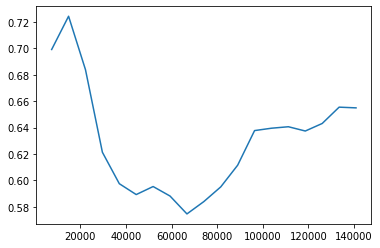

In [26]:
plt.plot(sizeTrainings, resultsTrainMSE)

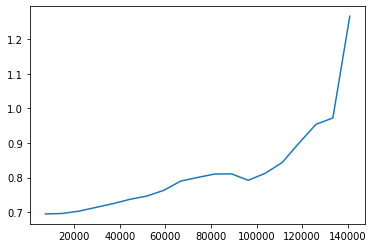

In [27]:
plt.plot(sizeTrainings, resultsTestMSE)

## Tasks — Classification (week 2):
In this question we’ll alter the prediction from our regression task, so that we are now classifying whether a review is verified. Continue using the 90%/10% training and test sets you constructed previously, i.e., train on the training set and report the error/accuracy on the testing set.


#### 8. First, let’s train a predictor that estimates whether a review is verified using the rating and the length: p(review is verified) ≃ σ(θ0 + θ1 × [star rating] + θ2 × [review length])
Train a logistic regressor to make the above prediction (you may use a logistic regression library with de- fault parameters, e.g. linear model.LogisticRegression() from sklearn). Report the classification accuracy of this predictor. Report also the proportion of labels that are positive (i.e., the proportion of reviews that are verified) and the proportion of predictions that are positive (1 mark).

Answer: <br>
(1) <br>
classification accuracy of testing set: 0.5597734475085968 <br>
classification accuracy of training set: 0.9511683485791772 <br>
(2) <br>
propotion of labels in testing set that are positive: 0.5595711684984155 <br>
propotion of labels in training set that are positive: 0.9513856112197424 <br>
(3) <br>
propotion of predictions of testing set that are positive: 0.9989886049490931 <br>
propotion of predictions of training set that are positive: 0.9996478846859805 <br>

In [28]:
def feature4(row):
    feat = [1]
    feat.append(row['star_rating'])
    feat.append(len(str(row['review_body'])))
    return feat

X4 = []

for index, row in giftcard.iterrows():
    X4.append(feature4(row))

In [29]:
def feature5(row):
    if row['verified_purchase'] == 'Y':
        return 1
    else:
        return 0

Y4 = []

for index, row in giftcard.iterrows():
    Y4.append(feature5(row))

In [30]:
numTraining = int(giftcard.shape[0] * 0.9)

X4_train = X4[:numTraining]
Y4_train = Y4[:numTraining]
X4_test = X4[numTraining:]
Y4_test = Y4[numTraining:]

In [31]:
model = linear_model.LogisticRegression()
model.fit(X4_train, Y4_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
train_predictions = model.predict(X4_train)
test_predictions = model.predict(X4_test)

In [33]:
# Accuracy from testing set
sum(test_predictions == Y4_test) / len(Y4_test)

0.5597734475085968

In [34]:
# Accuracy from training set
sum(train_predictions == Y4_train) / len(Y4_train)

0.9511683485791772

In [35]:
# Proportion of labels that are positive
sum(Y4) / len(Y4)

0.9122041669476098

In [36]:
# Proportion of labels that are positive in training set 
sum(Y4_train) / len(Y4_train)

0.9513856112197424

In [39]:
# Proportion of predictions that are positive in training set 
sum(train_predictions) / len(train_predictions)

0.9996478846859805

In [37]:
# Proportion of labels that are positive in testing set 
sum(Y4_test) / len(Y4_test)

0.5595711684984155

In [38]:
# Proportion of predictions that are positive in testing set 
sum(test_predictions) / len(test_predictions)

0.9989886049490931

#### 9. Considering same prediction problem as above, can you come up with a more accurate predictor (e.g. using features from the text, timestamp, etc.)? Write down the feature vector you design, and report its train/test accuracy

Answer: <br>
From Q8, we aware that the propotion of positive labels in testing set and training set have significant difference. Say, 56% positive labels in testing set and 95% positive labels in training set. Hence, the label balances in training/testing have huge difference. As a result, we propose to shuffle the whole dataset in advance, and then separate the data into training and testing with the same propotion 90%/10%. <br>

Based on our new training/testing data set, the accuracy for testing set is 91.16% and accuracy of training set is 91.04% <br>

Also, on the top of data shuffling, we add features 'total_votes', because we think that the more 'total_votes' can help explain that the review is verified. By adding the feature 'total_votes', we are able to improve our testing accuracy to 91.44% and the accuracy of training set is 91.19%.

In [42]:
XY5 = list(zip(X4,Y4))
random.shuffle(XY5)

In [43]:
X5 = [d[0] for d in XY5]
Y5 = [d[1] for d in XY5]

In [44]:
numTraining = int(giftcard.shape[0] * 0.9)

X5_train = X5[:numTraining]
Y5_train = Y5[:numTraining]
X5_test = X5[numTraining:]
Y5_test = Y5[numTraining:]

In [45]:
model = linear_model.LogisticRegression()
model.fit(X5_train, Y5_train)

train_predictions = model.predict(X5_train)
test_predictions = model.predict(X5_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
# Accuracy from testing set
sum(test_predictions == Y5_test) / len(Y5_test)

0.9116040725507383

In [47]:
# Accuracy from training set
sum(train_predictions == Y5_train) / len(Y5_train)

0.9104353493808015

In [67]:
def feature6(row):
    feat = [1]
    feat.append(row['star_rating'])
    feat.append(row['total_votes'])
    return feat

X6 = []
Y6 = Y4

for index, row in giftcard.iterrows():
    X6.append(feature6(row))

In [68]:
XY6 = list(zip(X6,Y6))
random.shuffle(XY6)
X6 = [d[0] for d in XY6]
Y6 = [d[1] for d in XY6]

In [69]:
numTraining = int(giftcard.shape[0] * 0.9)

X6_train = X6[:numTraining]
Y6_train = Y6[:numTraining]
X6_test = X6[numTraining:]
Y6_test = Y6[numTraining:]

In [70]:
model = linear_model.LogisticRegression()
model.fit(X6_train, Y6_train)

train_predictions = model.predict(X6_train)
test_predictions = model.predict(X6_test)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
# Accuracy from testing set
sum(test_predictions == Y6_test) / len(Y6_test)

0.9143685523565505

In [72]:
# Accuracy from training set
sum(train_predictions == Y6_train) / len(Y6_train)

0.9119561878647577